In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

2025-11-02 01:40:18.752107: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-02 01:40:18.779010: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-02 01:40:18.779042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-02 01:40:18.779907: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-02 01:40:18.784471: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# 데이터셋 나누기
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
print(y_train.shape)
print(y_test.shape)

(8982,)
(2246,)


In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # GPU 사용 안 함


2025-11-02 01:40:20.604854: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/200
450/450 [==============================] - 12s 24ms/step - loss: 2.2393 - accuracy: 0.4389 - val_loss: 2.0079 - val_accuracy: 0.5045
Epoch 2/200
450/450 [==============================] - 10s 22ms/step - loss: 1.9298 - accuracy: 0.5049 - val_loss: 1.8057 - val_accuracy: 0.5338
Epoch 3/200
450/450 [==============================] - 10s 22ms/step - loss: 1.8099 - accuracy: 0.5311 - val_loss: 1.7635 - val_accuracy: 0.5552
Epoch 4/200
450/450 [==============================] - 10s 23ms/step - loss: 1.6767 - accuracy: 0.5652 - val_loss: 1.7092 - val_accuracy: 0.5561
Epoch 5/200
450/450 [==============================] - 10s 23ms/step - loss: 1.5627 - accuracy: 0.6041 - val_loss: 1.5955 - val_accuracy: 0.6046
Epoch 6/200
450/450 [==============================] - 10s 23ms/step - loss: 1.5125 - accuracy: 0.6129 - val_loss: 1.4958 - val_accuracy: 0.6269
Epoch 7/200
450/450 [==============================] - 10s 23ms/step - loss: 1.3615 - accuracy: 0.6566 - val_loss: 1.4461 - val_ac

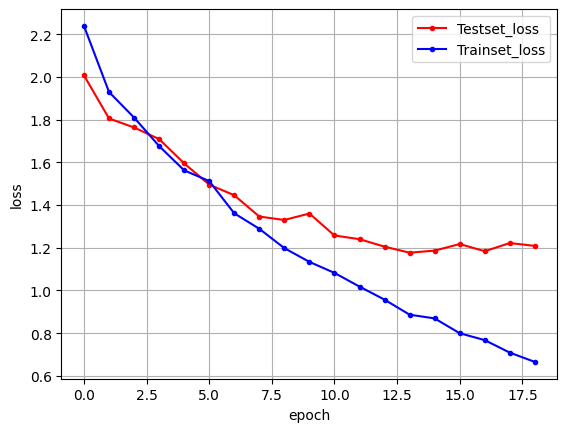

In [5]:
# 단어의 수를 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# LSTM 모델 구조 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 실행 옵션 정의
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()